# Projeto 2 - Métodos de Aprendizagem Supervisionada

### Grupo
- Ismael Pereira Santos de Melo - RA175460
- Willian Massahiro Hayashida - RA188705


# PART I - Regression Task

## Loading Data

### Visualizing kicks

In [1]:
import pandas as pd
import numpy as np
import time
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

from math import sqrt

Kick1 = pd.read_csv('data/kick1.dat', delimiter=' ', names=['x', 'y','z'])
Kick2 = pd.read_csv('data/kick2.dat', delimiter=' ', names=['x', 'y','z'])

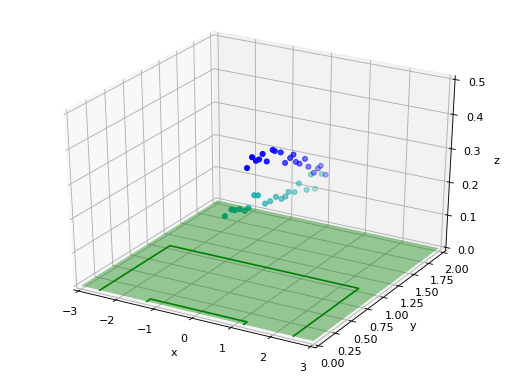

In [2]:
%matplotlib inline
fig = plt.figure(figsize=(8, 6), dpi=80)

ax = plt.axes(projection="3d")
ax.scatter3D(Kick1.x, Kick1.y, Kick1.z, c='#10a9a9');
ax.scatter3D(Kick2.x, Kick2.y, Kick2.z, c='b');

X_field,Y_field = np.meshgrid(np.linspace(-3,3,4), np.linspace(0,2,2))
Z_field = np.zeros(X_field.shape)
ax.plot_surface(X_field,Y_field,Z_field,shade=False, color='g', alpha=0.4)
ax.plot([-2.5 , -2.5, 2.5, 2.5], [0, 1, 1, 0], zdir ='z', zs=0, c='g')
ax.plot([-1.25, -1.25, 1.25, 1.25], [0, 0.05, 0.05, 0], zdir ='z', zs=0, c='g')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.set_xlim(-3, 3)
ax.set_ylim(0 ,2)
ax.set_zlim(0, 0.5)

plt.show()

### Initializing variables

In [3]:
kick_data = []

X = Kick1.x.values
Y = Kick1.y.values
Z = Kick1.z.values

kick_data.append({
    'X' : {
        'data' : X,
        'linear_model': {
            'theta' : {},
            'cost' : {}  
        },
        'polinomial_model': {
            'theta' : {},
            'cost' : {}  
        }
    },
    'Y' : {
        'data' : Y,
        'linear_model': {
            'theta' : {},
            'cost' : {}  
        },
        'polinomial_model': {
            'theta' : {},
            'cost' : {}  
        }
    },
    'Z' : {
        'data' : Z,
        'linear_model': {
            'theta' : {},
            'cost' : {}  
        },
        'polinomial_model': {
            'theta' : {},
            'cost' : {}  
        }
    },
})

X = Kick2.x.values
Y = Kick2.y.values
Z = Kick2.z.values

kick_data.append({
    'X' : {
        'data' : X,
        'linear_model': {
            'theta' : {},
            'cost' : {}  
        },
        'polinomial_model': {
            'theta' : {},
            'cost' : {}  
        }
    },
    'Y' : {
        'data' : Y,
        'linear_model': {
            'theta' : {},
            'cost' : {}  
        },
        'polinomial_model': {
            'theta' : {},
            'cost' : {}  
        }
    },
    'Z' : {
        'data' : Z,
        'linear_model': {
            'theta' : {},
            'cost' : {}  
        },
        'polinomial_model': {
            'theta' : {},
            'cost' : {}  
        }
    },
})

In [4]:
kick_data[0]['X']['data']

array([-0.21 , -0.305, -0.368, -0.37 , -0.48 , -0.532, -0.575, -0.583,
       -0.618, -0.702, -0.783, -0.842, -0.882, -0.93 , -0.969, -0.989,
       -1.032, -1.088, -1.104, -1.192])

## Stochastic Gradient Descent

In [89]:
def stochasticGradientDescent(X_b, y, lr='opt', eta0=0.001, n_epochs=50, tol=0.0005):
  m = X_b.shape[0] 
#   cost = np.zeros(n_epochs)
  cost = []
  X_b = np.c_[np.ones((X_b.shape[0], 1)), X_b] 
  theta = np.random.rand(X_b.shape[1])
    
  X_b, y = shuffle(X_b, y)
  cost_func = 100000
  for epoch in range(n_epochs):
    if cost_func < tol:
      break
     
    for i in range(m):
      xi = X_b[i: i+1]
      yi = y[i: i+1]
      
      # calculate its gradient
#       print(xi[0].dot(theta))
      loss = xi[0].dot(theta) - yi
      gradients = xi.T.dot(loss)
#       print('loss: ', loss, ' xi: ', xi, ' grad: ', gradients)
#       gradients = xi[0].T * loss

      alpha = eta0
      # update parameters
#       if(lr == 'opt'):
#         alpha = 1.0 * eta0 / (1 + np.log(epoch+1))
        
      theta = theta - alpha * gradients
      
    #calculate the cost function
    cost_func = (loss ** 2)/2
    cost.append(cost_func)
 
  return theta, cost

## Batch Gradient Descent

In [6]:
def gradientDescent(X_b, y, lr='opt', eta0=0.005, n_epochs=50, tol=0.01):
    m = X_b.shape[0] 
    cost = []
    X_b = np.c_[np.ones((X_b.shape[0], 1)), X_b] 
    theta = np.random.rand(X_b.shape[1])

    X_b, y = shuffle(X_b, y)
    cost_func = 100000
    for epoch in range(n_epochs):
        if cost_func < tol:
            break
    
        # calculate its gradient
        loss = X_b.dot(theta) - y
        gradients = X_b.T.dot(loss) / m
        
        alpha = eta0
      # update parameters
#         if(lr == 'opt'):
#             alpha = 1.0 * eta0 / (10 + m * (epoch/25 + 10))
        
        theta = theta - alpha * gradients
      
        #calculate the cost function
        cost_func = (np.sum(loss) ** 2)/2
        cost.append(cost_func)
 
    return theta, cost

## Training - Linear Regression

In [144]:
t = np.linspace(1, 5, 20)
# t = t / 4

t = np.c_[t, t**2]

t

array([[ 1.        ,  1.        ],
       [ 1.21052632,  1.46537396],
       [ 1.42105263,  2.01939058],
       [ 1.63157895,  2.66204986],
       [ 1.84210526,  3.3933518 ],
       [ 2.05263158,  4.2132964 ],
       [ 2.26315789,  5.12188366],
       [ 2.47368421,  6.11911357],
       [ 2.68421053,  7.20498615],
       [ 2.89473684,  8.37950139],
       [ 3.10526316,  9.64265928],
       [ 3.31578947, 10.99445983],
       [ 3.52631579, 12.43490305],
       [ 3.73684211, 13.96398892],
       [ 3.94736842, 15.58171745],
       [ 4.15789474, 17.28808864],
       [ 4.36842105, 19.08310249],
       [ 4.57894737, 20.966759  ],
       [ 4.78947368, 22.93905817],
       [ 5.        , 25.        ]])

### Stochastic Gradient Descent

In [60]:
n_epochs = 100000
tol = 0.00005

for i in range(2):
    print('---------')
    print('Kick: ', i+1, ' | index: ', i)
    for dim in kick_data[i]:
        starter_time = time.time()
        x = t[:,0]
        y = kick_data[i][dim]['data']
        theta, cost = stochasticGradientDescent(x, y, eta0=0.5, lr='opt', n_epochs=n_epochs, tol=tol) 
        time_1 = time.time() - starter_time

        num_iterations = len(cost)
        print("  training: ", dim)
        print("  - time of training linear regression with SGD: ", time_1)
        print("  - minimun cost: ", min(cost))
        print("  - num of iterations: ", num_iterations)
        print()

        kick_data[i][dim]['linear_model']['theta']['SGD'] = theta
        kick_data[i][dim]['linear_model']['cost']['SGD'] = cost



---------
Kick:  1  | index:  0
  training:  X
  - time of training linear regression with SGD:  0.028039932250976562
  - minimun cost:  [4.98126468e-05]
  - num of iterations:  279

  training:  Y
  - time of training linear regression with SGD:  8.468534708023071
  - minimun cost:  [0.00543433]
  - num of iterations:  100000

  training:  Z
  - time of training linear regression with SGD:  8.784987211227417
  - minimun cost:  [5.8246402e-05]
  - num of iterations:  100000

---------
Kick:  2  | index:  1
  training:  X
  - time of training linear regression with SGD:  0.0009744167327880859
  - minimun cost:  [5.91506968e-06]
  - num of iterations:  3

  training:  Y
  - time of training linear regression with SGD:  0.06299901008605957
  - minimun cost:  [4.98363638e-05]
  - num of iterations:  752

  training:  Z
  - time of training linear regression with SGD:  8.750635385513306
  - minimun cost:  [0.00034603]
  - num of iterations:  100000



### Batch Gradient Descent

In [13]:
n_epochs = 150000
tol = 0.01
for i in range(2):
    print('---------')
    print('Kick: ', i+1, ' | index: ', i)
    for dim in kick_data[i]:
        starter_time = time.time()
        x = t[:,0]
        y = kick_data[i][dim]['data']
        theta, cost = gradientDescent(x, y, eta0=0.5, lr='opt', n_epochs=n_epochs, tol=tol) 
        time_1 = time.time() - starter_time

        num_iterations = len(cost)
        print("training: ", dim)
        print("- time of training linear regression with GD: ", time_1)
        print("- minimun cost: ", min(cost))
        print("- num of iterations: ", num_iterations)
        print()

        kick_data[i][dim]['linear_model']['theta']['GD'] = theta
        kick_data[i][dim]['linear_model']['cost']['GD'] = cost

---------
Kick:  1  | index:  0
training:  X
- time of training linear regression with GD:  0.021518945693969727
- minimun cost:  0.009938130052023783
- num of iterations:  1462

training:  Y
- time of training linear regression with GD:  1.356539011001587
- minimun cost:  0.821038730267173
- num of iterations:  150000

training:  Z
- time of training linear regression with GD:  0.029001712799072266
- minimun cost:  0.009988119297530433
- num of iterations:  2916

---------
Kick:  2  | index:  1
training:  X
- time of training linear regression with GD:  0.028998136520385742
- minimun cost:  0.0099790351469459
- num of iterations:  2940

training:  Y
- time of training linear regression with GD:  1.3002393245697021
- minimun cost:  0.7169348100390619
- num of iterations:  150000

training:  Z
- time of training linear regression with GD:  0.04199528694152832
- minimun cost:  0.009998813284534225
- num of iterations:  5083



### Cost Function - Linear Regression

Stochastic Gradient Descent - Cost Function
---------
Kick:  1  | index:  0


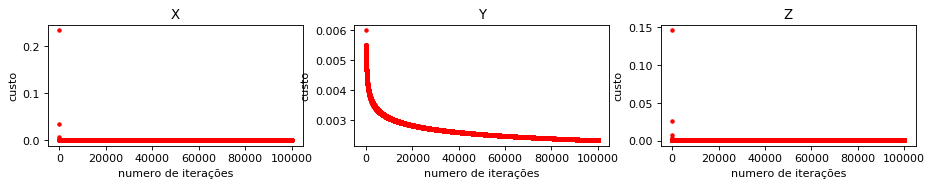

---------
Kick:  2  | index:  1


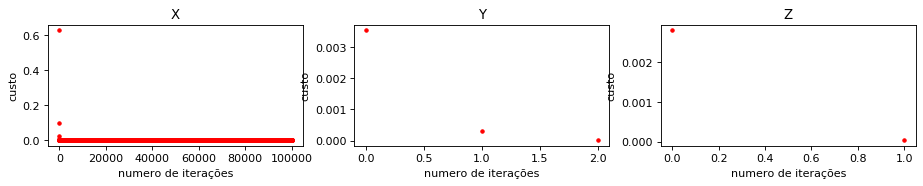

In [14]:
%matplotlib inline
print("Stochastic Gradient Descent - Cost Function")
for i in range(2):
    print('---------')
    print('Kick: ', i+1, ' | index: ', i)
    fig = plt.figure(figsize=(14, 2), dpi=80)
    j = 1
    for dim in kick_data[i]:
        num_iterations = len(kick_data[i][dim]['linear_model']['cost']['SGD'])
        ax = plt.subplot(1, 3, j)
        ax.plot(np.arange(0,num_iterations), kick_data[i][dim]['linear_model']['cost']['SGD'], "r.")
        ax.set_ylabel('custo')
        ax.set_xlabel('numero de iterações')
        ax.set_title(dim)
        j = j + 1
    plt.show()

Batch Gradient Descent - Cost Function
---------
Kick:  1  | index:  0


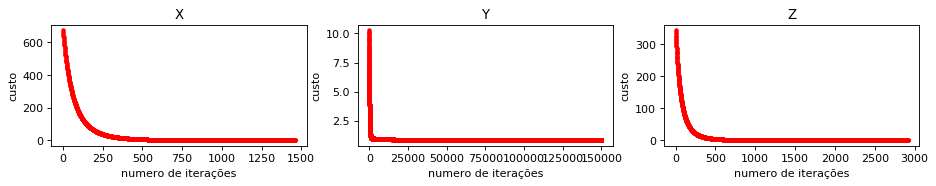

---------
Kick:  2  | index:  1


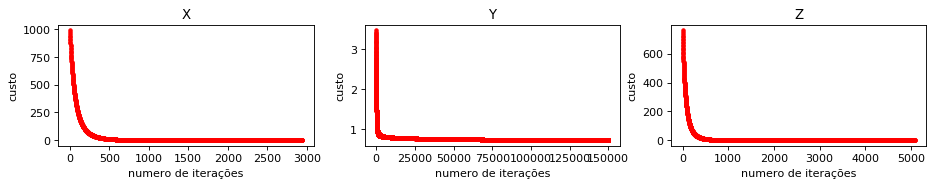

In [15]:
%matplotlib inline
print("Batch Gradient Descent - Cost Function")
for i in range(2):
    print('---------')
    print('Kick: ', i+1, ' | index: ', i)
    fig = plt.figure(figsize=(14, 2), dpi=80)
    j = 1
    for dim in kick_data[i]:
        num_iterations = len(kick_data[i][dim]['linear_model']['cost']['GD'])
        ax = plt.subplot(1, 3, j)
        ax.plot(np.arange(0,num_iterations), kick_data[i][dim]['linear_model']['cost']['GD'], "r.")
        ax.set_ylabel('custo')
        ax.set_xlabel('numero de iterações')
        ax.set_title(dim)
        j = j + 1
    plt.show()

## Training - Polinomial Regression

In [145]:
t = np.linspace(1, 5, 20)
# t = t / 4
t = np.c_[t, t**2]
t

array([[ 1.        ,  1.        ],
       [ 1.21052632,  1.46537396],
       [ 1.42105263,  2.01939058],
       [ 1.63157895,  2.66204986],
       [ 1.84210526,  3.3933518 ],
       [ 2.05263158,  4.2132964 ],
       [ 2.26315789,  5.12188366],
       [ 2.47368421,  6.11911357],
       [ 2.68421053,  7.20498615],
       [ 2.89473684,  8.37950139],
       [ 3.10526316,  9.64265928],
       [ 3.31578947, 10.99445983],
       [ 3.52631579, 12.43490305],
       [ 3.73684211, 13.96398892],
       [ 3.94736842, 15.58171745],
       [ 4.15789474, 17.28808864],
       [ 4.36842105, 19.08310249],
       [ 4.57894737, 20.966759  ],
       [ 4.78947368, 22.93905817],
       [ 5.        , 25.        ]])

In [49]:
# np.arange(0,2,1/60)

### Stochastic Gradient Descent

In [147]:
n_epochs = 150000
tol = 1e-4

for j in range(1):
    i = j + 1
    print('---------')
    print('Kick: ', i+1, ' | index: ', i)
    for dim in kick_data[i]:
        starter_time = time.time()
        x = t
        y = kick_data[i][dim]['data']
        theta, cost = stochasticGradientDescent(x, y, eta0=0.001, lr='opt', n_epochs=n_epochs, tol=tol) 
        time_1 = time.time() - starter_time

        num_iterations = len(cost)
        print("  training: ", dim)
        print("  - time of training linear regression with SGD: ", time_1)
        print("  - minimun cost: ", min(cost))
        print("  - num of iterations: ", num_iterations)
        print()

        kick_data[i][dim]['polinomial_model']['theta']['SGD'] = theta
        kick_data[i][dim]['polinomial_model']['cost']['SGD'] = cost

---------
Kick:  2  | index:  1
  training:  X
  - time of training linear regression with SGD:  12.167137384414673
  - minimun cost:  [8.31548425e-08]
  - num of iterations:  150000

  training:  Y
  - time of training linear regression with SGD:  0.5190556049346924
  - minimun cost:  [9.98104418e-09]
  - num of iterations:  6455

  training:  Z
  - time of training linear regression with SGD:  12.095202207565308
  - minimun cost:  [2.88775813e-06]
  - num of iterations:  150000



In [148]:
t_line = np.linspace(1, 5, 20)


t_line = np.c_[t_line, t_line**2]
t_line = np.c_[np.ones((t_line.shape[0], 1)), t_line] 


In [149]:
X_pol = t_line.dot(kick_data[1]['X']['polinomial_model']['theta']['SGD'])
Y_pol = t_line.dot(kick_data[1]['Y']['polinomial_model']['theta']['SGD'])
Z_pol = t_line.dot(kick_data[1]['Z']['polinomial_model']['theta']['SGD'])


In [150]:
print(min(Y_pol), max(Y_pol))
kick_data[1]['Y']['polinomial_model']['theta']['SGD']

t0 = kick_data[1]['Y']['polinomial_model']['theta']['SGD'][0]
t1 = kick_data[1]['Y']['polinomial_model']['theta']['SGD'][1]
t2 = kick_data[1]['Y']['polinomial_model']['theta']['SGD'][2]


Y_pol_mult = t0 + t1*t_line + t2*t_line**2
Y_pol_mult

1.0957896333653072 1.9772459192525826


array([[  1.97724592,   1.97724592,   1.97724592],
       [  1.97724592,   1.94675888,   1.90748899],
       [  1.97724592,   1.91450457,   1.81318545],
       [  1.97724592,   1.88048299,   1.68846071],
       [  1.97724592,   1.84469415,   1.52650028],
       [  1.97724592,   1.80713804,   1.31954974],
       [  1.97724592,   1.76781467,   1.05891472],
       [  1.97724592,   1.72672403,   0.73496092],
       [  1.97724592,   1.68386613,   0.33711414],
       [  1.97724592,   1.63924096,  -0.14613979],
       [  1.97724592,   1.59284852,  -0.72725494],
       [  1.97724592,   1.54468882,  -1.41962534],
       [  1.97724592,   1.49476185,  -2.23758493],
       [  1.97724592,   1.44306762,  -3.19640758],
       [  1.97724592,   1.38960612,  -4.31230711],
       [  1.97724592,   1.33437735,  -5.60243724],
       [  1.97724592,   1.27738132,  -7.08489166],
       [  1.97724592,   1.21861802,  -8.77870395],
       [  1.97724592,   1.15808746, -10.70384765],
       [  1.97724592,   1.09578

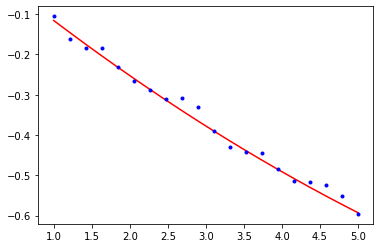

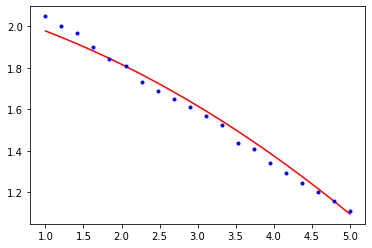

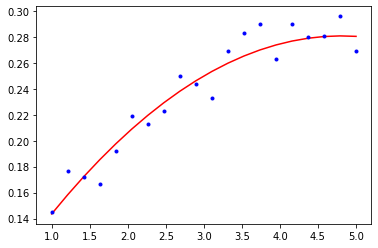

In [151]:
%matplotlib inline
fig = plt.figure()
ax = plt.axes()
ax.plot(t_line[:,1],X_pol,'r')
ax.plot(t_line[:,1], Kick2.x,'b.')
plt.show()

fig = plt.figure()
ax = plt.axes()
ax.plot(t_line[:,1],Y_pol,'r')
ax.plot(t_line[:,1], Kick2.y,'b.')
plt.show()

fig = plt.figure()
ax = plt.axes()
ax.plot(t_line[:,1],Z_pol,'r')
ax.plot(t_line[:,1], Kick2.z,'b.')
plt.show()

In [114]:
Kick2.y

0     2.048
1     1.999
2     1.968
3     1.902
4     1.841
5     1.807
6     1.733
7     1.690
8     1.649
9     1.611
10    1.568
11    1.523
12    1.438
13    1.408
14    1.340
15    1.295
16    1.244
17    1.201
18    1.159
19    1.109
Name: y, dtype: float64

In [194]:
%matplotlib qt

fig = plt.figure(figsize=(8, 6), dpi=80)

ax = plt.axes(projection="3d")

# ax.scatter3D(Kick1.x, Kick1.y, Kick1.z, c='#10a9a9', label="1 - kick")

# kick two
ax.scatter3D(Kick2.x, Kick2.y, Kick2.z, c='#0000fa', label="2 - kick")

ax.plot(
    X_pol, 
    Y_pol, 
    Z_pol, 
    c='#10a9a9', 
    label='2 - SGD - polinomial reg.', 
    alpha=0.8
)

ax.plot(X_pol, Z_pol, zdir='y', zs=2, alpha=.25, c='k')
ax.plot(Y_pol, Z_pol, zdir='x', zs=-3, alpha=.25, c='k')
ax.plot(X_pol, Y_pol, zdir='z', zs=0, alpha=.25, c='k')

ax.legend()

# field
X_field,Y_field = np.meshgrid(np.linspace(-3,3,4), np.linspace(0,2,2))
Z_field = np.zeros(X_field.shape)
ax.plot_surface(X_field,Y_field,Z_field,shade=False, color='g', alpha=0.4)
ax.plot([-2.5 , -2.5, 2.5, 2.5], [0, 1, 1, 0], zdir ='z', zs=0, c='g')
ax.plot([-1.25, -1.25, 1.25, 1.25], [0, 0.05, 0.05, 0], zdir ='z', zs=0, c='g')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# ax.set_xlim(-3, 3)
# ax.set_ylim(0 ,2)
# ax.set_zlim(0, 0.5)

plt.show()

### Batch Gradient Descent

In [165]:
n_epochs = 400000
tol = 0.00005
for i in range(2):
    print('---------')
    print('Kick: ', i+1, ' | index: ', i)
    for dim in kick_data[i]:
        starter_time = time.time()
        x = t
        y = kick_data[i][dim]['data']
        theta, cost = gradientDescent(x, y, eta0=0.00025, lr='opt', n_epochs=n_epochs, tol=tol) 
        time_1 = time.time() - starter_time

        num_iterations = len(cost)
        print("training: ", dim)
        print("- time of training linear regression with GD: ", time_1)
        print("- minimun cost: ", min(cost))
        print("- num of iterations: ", num_iterations)
        print()

        kick_data[i][dim]['polinomial_model']['theta']['GD'] = theta
        kick_data[i][dim]['polinomial_model']['cost']['GD'] = cost

---------
Kick:  1  | index:  0
training:  X
- time of training linear regression with GD:  3.2739977836608887
- minimun cost:  18.44239854172909
- num of iterations:  400000

training:  Y
- time of training linear regression with GD:  3.2825839519500732
- minimun cost:  0.0006212536995104355
- num of iterations:  400000

training:  Z
- time of training linear regression with GD:  3.26585054397583
- minimun cost:  392.81334651082915
- num of iterations:  400000

---------
Kick:  2  | index:  1
training:  X
- time of training linear regression with GD:  3.47615647315979
- minimun cost:  139.0924613196554
- num of iterations:  400000

training:  Y
- time of training linear regression with GD:  3.4641506671905518
- minimun cost:  43.818466089643984
- num of iterations:  400000

training:  Z
- time of training linear regression with GD:  3.478050947189331
- minimun cost:  107.3925928093992
- num of iterations:  400000



### Cost Function - Polinomial Regression

In [11]:
%matplotlib inline
print("Stochastic Gradient Descent - Cost Function")
for i in range(2):
    print('---------')
    print('Kick: ', i+1, ' | index: ', i)
    fig = plt.figure(figsize=(14, 2), dpi=80)
    j = 1
    for dim in kick_data[i]:
        num_iterations = len(kick_data[i][dim]['polinomial_model']['cost']['SGD'])
        ax = plt.subplot(1, 3, j)
        ax.plot(np.arange(0,num_iterations), kick_data[i][dim]['polinomial_model']['cost']['SGD'], "r.")
        ax.set_ylabel('custo')
        ax.set_xlabel('numero de iterações')
        ax.set_title(dim)
        j = j + 1
    plt.show()

Stochastic Gradient Descent - Cost Function
---------
Kick:  1  | index:  0


KeyError: 'SGD'

<Figure size 1120x160 with 0 Axes>

In [ ]:
%matplotlib inline
print("Batch Gradient Descent - Cost Function")
for i in range(2):
    print('---------')
    print('Kick: ', i+1, ' | index: ', i)
    fig = plt.figure(figsize=(14, 2), dpi=80)
    j = 1
    for dim in kick_data[i]:
        num_iterations = len(kick_data[i][dim]['polinomial_model']['cost']['GD'])
        ax = plt.subplot(1, 3, j)
        ax.plot(np.arange(0,num_iterations), kick_data[i][dim]['polinomial_model']['cost']['GD'], "r.")
        ax.set_ylabel('custo')
        ax.set_xlabel('numero de iterações')
        ax.set_title(dim)
        j = j + 1
    plt.show()

## Validating Model

In [18]:
def predictModel(X, Y, theta):
  X = np.c_[np.ones((X.shape[0], 1)), X] 

  predict_values = X.dot(theta)
  
  return predict_values

In [ ]:
t_line = np.linspace(-20, 99, 120)
t_line = np.c_[t_line, t_line**2]
m = t_line.shape[0]

max_quad = max(t_line[:,1])
t_line[:,1] = t_line[:,1] / max_quad
Kick_Model = []

for i in range(2):
    Kick_Model.append({
        'X' : {
            'linear_model': {
                'SGD': predictModel(t_line[:,0], kick_data[i]['X']['data'], kick_data[i]['X']['linear_model']['theta']['SGD']), 
                'GD' : predictModel(t_line[:,0], kick_data[i]['X']['data'], kick_data[i]['X']['linear_model']['theta']['GD'])
            },
            'polinomial_model': {
                'SGD': predictModel(t_line, kick_data[i]['X']['data'], kick_data[i]['X']['polinomial_model']['theta']['SGD']), 
                'GD' : predictModel(t_line, kick_data[i]['X']['data'], kick_data[i]['X']['polinomial_model']['theta']['GD'])
            }
        },
        'Y' : {
            'linear_model': {
                'SGD': predictModel(t_line[:,0], kick_data[i]['Y']['data'], kick_data[i]['Y']['linear_model']['theta']['SGD']), 
                'GD' : predictModel(t_line[:,0], kick_data[i]['Y']['data'], kick_data[i]['Y']['linear_model']['theta']['GD'])
            },
            'polinomial_model': {
                'SGD': predictModel(t_line, kick_data[i]['Y']['data'], kick_data[i]['Y']['polinomial_model']['theta']['SGD']), 
                'GD' : predictModel(t_line, kick_data[i]['Y']['data'], kick_data[i]['Y']['polinomial_model']['theta']['GD'])
            }
        },
        'Z' : {
            'linear_model': {
                'SGD': predictModel(t_line[:,0], kick_data[i]['Z']['data'], kick_data[i]['Z']['linear_model']['theta']['SGD']), 
                'GD' : predictModel(t_line[:,0], kick_data[i]['Z']['data'], kick_data[i]['Z']['linear_model']['theta']['GD'])
            },
            'polinomial_model': {
                'SGD': predictModel(t_line, kick_data[i]['Z']['data'], kick_data[i]['Z']['polinomial_model']['theta']['SGD']), 
                'GD' : predictModel(t_line, kick_data[i]['Z']['data'], kick_data[i]['Z']['polinomial_model']['theta']['GD'])
            }
        }
    })



In [ ]:
%matplotlib qt
fig = plt.figure(figsize=(8, 6), dpi=80)

ax = plt.axes(projection="3d")

# ax.scatter3D(Kick1.x, Kick1.y, Kick1.z, c='#10a9a9', label="1 - kick")
# ax.plot3D(
#     Kick_Model[0]['X']['linear_model']['SGD'], 
#     Kick_Model[0]['Y']['linear_model']['SGD'], 
#     Kick_Model[0]['Z']['linear_model']['SGD'], 
#     c='#40baba', 
#     label='1 - SGD - linear reg.', 
#     alpha=0.8
# )
# ax.plot3D(
#     Kick_Model[0]['X']['linear_model']['GD'], 
#     Kick_Model[0]['Y']['linear_model']['GD'], 
#     Kick_Model[0]['Z']['linear_model']['GD'], 
#     '--',
#     c='#10a9a9', 
#     label='1 - GD - linear reg.', 
#     alpha=0.8
# )

# kick two
ax.scatter3D(Kick2.x, Kick2.y, Kick2.z, c='#0000fa', label="2 - kick")
# ax.plot3D(
#     Kick_Model[1]['X']['linear_model']['SGD'], 
#     Kick_Model[1]['Y']['linear_model']['SGD'], 
#     Kick_Model[1]['Z']['linear_model']['SGD'], 
#     c='#0000fa', 
#     label='2 - SGD - linear reg.', 
#     alpha=0.8
# )
# ax.plot3D(
#     Kick_Model[1]['X']['linear_model']['GD'], 
#     Kick_Model[1]['Y']['linear_model']['GD'], 
#     Kick_Model[1]['Z']['linear_model']['GD'], 
#     '--',
#     c='#0000fa', 
#     label='2 - GD - linear reg.', 
#     alpha=0.7
# )
ax.plot3D(
    Kick_Model[1]['X']['polinomial_model']['SGD'], 
    Kick_Model[1]['Y']['polinomial_model']['SGD'], 
    Kick_Model[1]['Z']['polinomial_model']['SGD'], 
    c='#10a9a9', 
    label='2 - SGD - polinomial reg.', 
    alpha=0.8
)
ax.plot3D(
    Kick_Model[1]['X']['polinomial_model']['GD'], 
    Kick_Model[1]['Y']['polinomial_model']['GD'], 
    Kick_Model[1]['Z']['polinomial_model']['GD'], 
    '--',
    c='#10a9a9', 
    label='2 - GD - polinomial reg.', 
    alpha=0.7
)


# ax.plot3D(X_line, Y_line, Z_line, c='#0000fa', label='2 - SGD - linear reg.', alpha=0.8)
# ax.plot3D(X_line_GD, Y_line_GD, Z_line_GD, '--', c='#1a1afb', label='2 - GD - linear reg.', alpha=0.8)

ax.legend()

# field
X_field,Y_field = np.meshgrid(np.linspace(-3,3,4), np.linspace(0,2,2))
Z_field = np.zeros(X_field.shape)
ax.plot_surface(X_field,Y_field,Z_field,shade=False, color='g', alpha=0.4)
ax.plot([-2.5 , -2.5, 2.5, 2.5], [0, 1, 1, 0], zdir ='z', zs=0, c='g')
ax.plot([-1.25, -1.25, 1.25, 1.25], [0, 0.05, 0.05, 0], zdir ='z', zs=0, c='g')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.set_xlim(-3, 3)
ax.set_ylim(0 ,2)
ax.set_zlim(0, 0.5)

plt.show()

In [ ]:
%matplotlib inline
fig = plt.figure(figsize=(8, 6), dpi=80)
ax = plt.axes()
ax.plot(Kick_Model[1]['Y']['polinomial_model']['SGD'], t_line[:,0])
plt.show()

In [ ]:
fig = plt.figure(figsize=(8, 6), dpi=80)

ax = plt.axes(projection="3d")


ax.plot3D(X_line_GD, Y_line_GD, Z_line_GD, 'gray')
ax.scatter3D(Kick2.x, Kick2.y, Kick2.z, c='b');

X_field,Y_field = np.meshgrid(np.linspace(-3,3,4), np.linspace(0,2,2))
Z_field = np.zeros(X_field.shape)
ax.plot_surface(X_field,Y_field,Z_field,shade=False, color='g', alpha=0.4)
ax.plot([-2.5 , -2.5, 2.5, 2.5], [0, 1, 1, 0], zdir ='z', zs=0, c='g')
ax.plot([-1.25, -1.25, 1.25, 1.25], [0, 0.05, 0.05, 0], zdir ='z', zs=0, c='g')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.set_xlim(-3, 3)
ax.set_ylim(0 ,2)
ax.set_zlim(0, 0.5)

plt.show()

In [ ]:

def meanSquaredError(Y_predicted, Y):
  error = 0
  m = len(Y_predicted)
  for i in range(m):
    error += ((Y_predicted[i] - Y[i])**2)
  return error/m

In [ ]:
prices_validation = predictModel(X_validation, y_validation, theta_best_SGD_1)

from sklearn.metrics import mean_squared_error

mse_val = meanSquaredError(prices_validation, y_validation)
mse_val_sklearn = mean_squared_error(y_validation, prices_validation)

print("Error:")
print(mse_val)
print(mse_val_sklearn)